<a href="https://colab.research.google.com/github/you9222/Digital_Finance/blob/main/Finance_matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **matplotlib**

# pyplot 기초

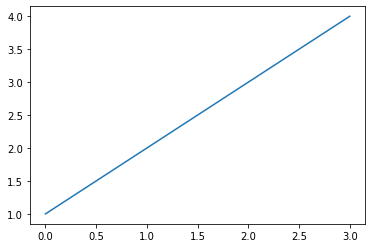

In [ ]:
import matplotlib.pyplot as plt

plt.plot([1,2,3,4])   # 0 1 2 3 이 1 2 3 4 와 만나는 그래프, 자동으로 실수로 됨

plt.show()

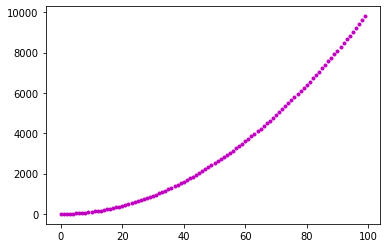

In [ ]:
x = range(0, 100)       # y = x^2 그래프
y = [ v*v for v in x ]
plt.plot(x, y, 'm.')    # 색상 + 마커

Fiqure와 subplots
한 화면에 여러 개 그래프

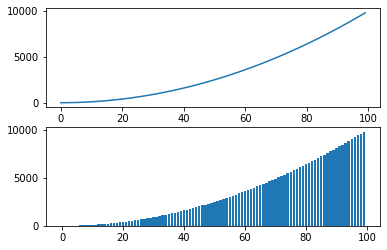

In [ ]:
#@title 기본 제목 텍스트
fig = plt.figure()              # Figure 객체를 생성
ax1 = fig.add_subplot(2, 1, 1)  # (행, 열, ax1 첫 번째 의미)
ax2 = fig.add_subplot(2, 1, 2)  # ( 1, 2, a ) 행 열 서로 바꾸면 세로로 두 개 그 중 a번째

##### 안에 그래프 넣기
x = range(0, 100)
y = [v*v for v in x]

ax1.plot(x,y)
ax2.bar(x,y)    # bar 그래프
#####

plt.show() # 코랩은 없어도 됨

Text(0, 0.5, 'cos(x)')

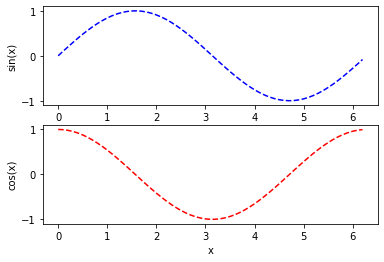

In [ ]:
import numpy as np    # sin, cos 그래프 그리기 np의 arange, pi 사용
import matplotlib.pyplot as plt

x = np.arange(0.0 , 2*np.pi, 0.1)   # x 좌표

sin_y = np.sin(x)                   # y
cos_y = np.cos(x)

fig = plt.figure()
sin = fig.add_subplot(2, 1, 1)
cos = fig.add_subplot(2, 1, 2)

sin.plot(x, sin_y, 'b--')
cos.plot(x, cos_y, 'r--')

# 라벨 추가
sin.set_xlabel('x')
sin.set_ylabel('sin(x)')

cos.set_xlabel('x')
cos.set_ylabel('cos(x)')

범례 및 두 개 그래프 그리기

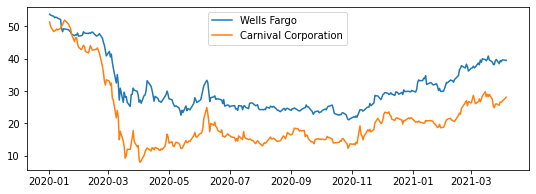

In [ ]:
import pandas_datareader.data as web
import matplotlib.pyplot as plt

wfc = web.DataReader('WFC', 'yahoo', '2020-01-01', '2021-04-06')  # 날짜 지정안하고 인자 2개 넣으면 10.01.01 ~
ccl = web.DataReader('CCL', 'yahoo', '2020-01-01', '2021-04-06')

plt.rcParams['figure.figsize'] = [9, 3]
plt.plot(wfc.index, wfc['Close'], label='Wells Fargo')
plt.plot(ccl.index, ccl['Close'], label='Carnival Corporation')

plt.legend(loc='upper center')    # 범례 추가, 위치 지정    best or 0 넣어도 됨

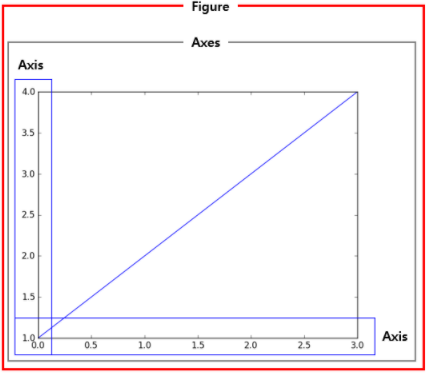

                  matplotlib의 Fiqure 구성

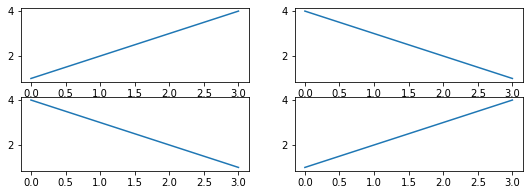

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 2)      # Figure, AxesSubplot 동시 객체 생성  2*2 형태

ax[0][0].plot([1, 2, 3, 4])       # 2차원 배열로 접근
ax[0][1].plot([4, 3, 2, 1])
ax[1][0].plot([4, 3, 2, 1])
ax[1][1].plot([1, 2, 3, 4])

plt.show()

# Candlestick, Bar, Pie Chart

수정종가와 거래량 동시 그래프

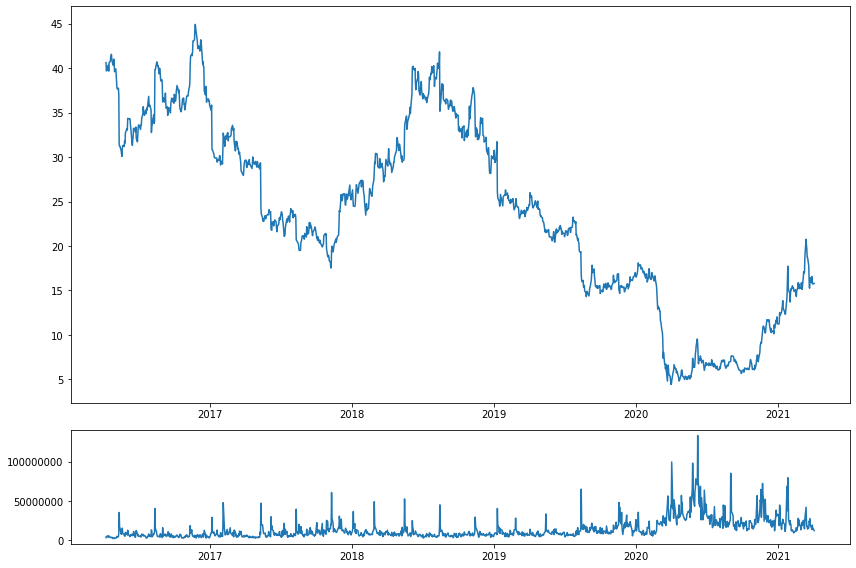

In [ ]:
import matplotlib.pyplot as plt
import pandas_datareader.data as web

m = web.DataReader('M', 'yahoo')      # 메이시스

fig = plt.figure(figsize = (12, 8))   # fig 객체 생성

top_axes = plt.subplot2grid((4,4), (0,0),rowspan=3,  colspan=4 )    # 파라미터 : .subplot2grid(shape, loc, rowspan = , colspan =, fig = none , **kwargs )
bot_axes = plt.subplot2grid((4,4), (3,0),rowspan=1,  colspan=4 )    # .subplot2grid를 add_subplot 대신 씀 / subplots의 위치나  크기를 조절할 때 사용
bot_axes.get_yaxis().get_major_formatter().set_scientific(False)    # 지수 표현 없애기

top_axes.plot(m.index, m['Close'], label="종가")
bot_axes.plot(m.index, m['Volume'])

plt.tight_layout()    # 여백없이 자동 최대 크기로 조절
plt.show()


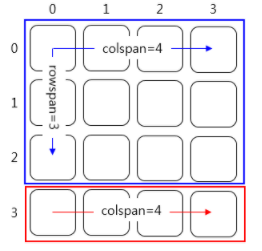

.subplot2grid((4,4), (0,0),rowspan=3,  colspan=4 ) 

> 파라미터 (shape, loc, rowspan = , colspan = )

> shape (4,4) : 4*4 grid 모양의 칸 생성

> loc (0,0) : 위치 지정 (0,0)에다가 생성

> rowspan = 3 : 행 크기 지정

> colspan = 4 : 행 크기 지정





**Candlestick Chart**

시가, 고가, 저가, 종가가 다 담아져 있음.

In [ ]:
pip install mpl_finance     # 봉 차트를 그리기 위해서 mpl_finance 모듈의 candlestick2_ohlc 필요

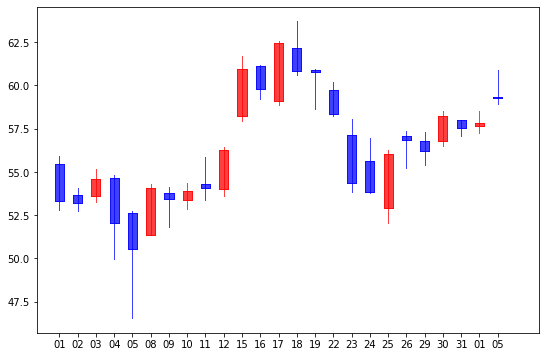

In [110]:
import matplotlib.ticker as ticker
import mpl_finance
import matplotlib.pyplot as plt
import pandas_datareader.data as web


ual = web.DataReader("UAL", "yahoo", "2021-03-01", "2021-04-06")    # 봉 차트는 한달 정도가 적당
ual = ual[ual['Volume'] > 0 ]   # yahoo는 공휴일에도 데이터가 존재 하므로 거래량 0인 날 제외

# ual.index[0]                // "Timestamp('2021-03-01 00:00:00') 1차원 배열로 날짜 데이터 있음.
# ual.index[0].strftime('%d') // '01'


fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)   # ( 1, 1, 1) 느낌

day_list = range(len(ual))  # 3.1 ~ 4.6 장 열린 날짜 // range(0, 25) 0 ~ 24 개


name_list = []                          # 날짜 데이터 넣으려고
for day in ual.index:                   # '01', '02' 같이 Day로 전부 추출
  name_list.append(day.strftime('%d'))

ax.xaxis.set_major_locator(ticker.FixedLocator(day_list))         # 위치설정 0 ~ 24 개의 맞춰
ax.xaxis.set_major_formatter(ticker.FixedFormatter(name_list))    # 출력 값 설정  추출한 day


mpl_finance.candlestick2_ohlc(ax, ual['Open'], ual['High'], ual['Low'], ual['Close'], width=0.5, colorup='r', colordown='b')
plt.show()    # 장 열리는 날만

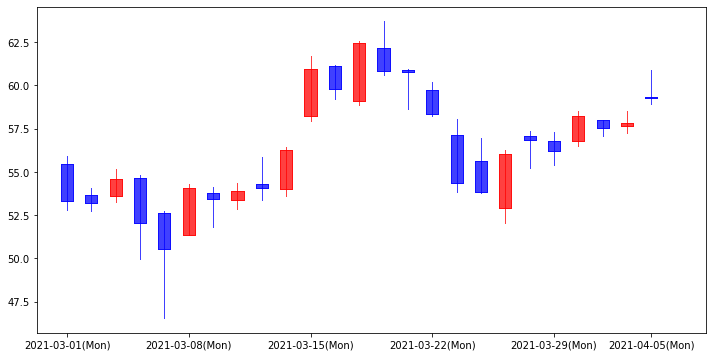

In [115]:
import matplotlib.ticker as ticker
import mpl_finance
import matplotlib.pyplot as plt
import pandas_datareader.data as web


ual = web.DataReader("UAL", "yahoo", "2021-03-01", "2021-04-06")
ual = ual[ual['Volume'] > 0 ]

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)


##### 매주 월요일만 X축에 표시
day_list = []
name_list = []

for i, day in enumerate(ual.index):
  if day.dayofweek == 0:          # Timestamp 객체 요일 알 수 있음 0이 월요일
    day_list.append(i)
    name_list.append(day.strftime('%Y-%m-%d') + '(Mon)')
###### dayofweek 으로 월요일만 day, name 추출 하고 

ax.xaxis.set_major_locator(ticker.FixedLocator(day_list))
ax.xaxis.set_major_formatter(ticker.FixedFormatter(name_list))


mpl_finance.candlestick2_ohlc(ax, ual['Open'], ual['High'], ual['Low'], ual['Close'], width=0.5, colorup='r', colordown='b')
plt.show()

**Bar Chart**

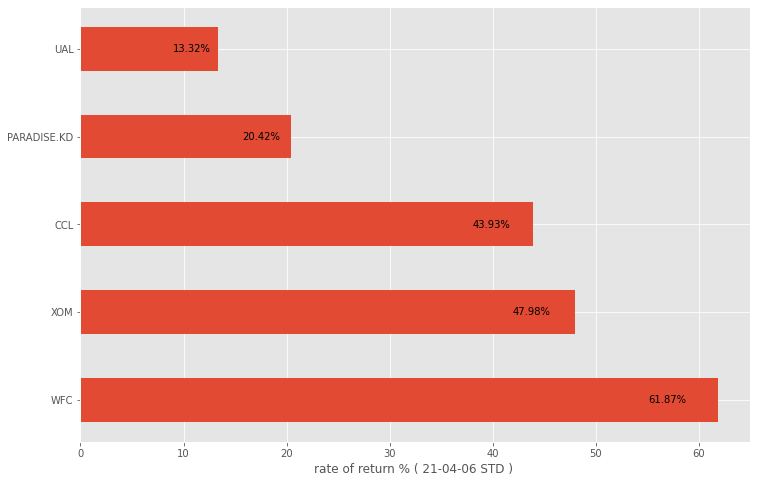

In [157]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import font_manager, rc   # 그래프 그릴때 한글 폰트 설정
from matplotlib import  style             # 그래프 스타일 변경 ( 변경 내용은 출력전에 해야함 plt.show() )

#font_name = font_manager.FontProperties(fname="C:\Windows\Fonts\malgunsl.ttf").get_name()
#rc('font', family=font_name)
# 유동적으로 사용 하고 싶은 폰트 이름 경로 설정

style.use('ggplot')   # 그래프 출력 스타일 사용 / 거의 첫 부분에 선언   matplotlib 여러 스타일 있음.

my_stock = ['WFC', 'XOM', 'CCL', 'PARADISE.KD', 'UAL']
my_profit = [61.87, 47.98, 43.93, 20.42, 13.32 ]

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

ypos = np.arange(5)   # 개수                                  # barh : 수평 bar 차트  
rects = plt.barh(ypos, my_profit, align='center', height=0.5) # 파라미터 : (bar 그려질 위치, bar 수치, 정렬위치, 차트높이)
plt.yticks(ypos,  my_stock)   # 수평 차트, y축에 ticker 표시

for i, rect in enumerate(rects):    # bar 끝에 수익률 text 출력
  ax.text( 0.95 * rect.get_width(), rect.get_y() + rect.get_height() / 2.0, str(my_profit[i]) + '%', ha='right', va='center')
"""
파라미터 : ax.text( x, y, s , ha, va )
       x : text가 출력될 x축 위치 : rect.get_width에서 rect는 각 bar 의미. 즉, 각 bar 너비를 알아 낸후 95% 지점에서 출력
       y : text가 출력될 y축 위치 : rect.het_y로 y축 높이를 얻어내고 bar의 절반의 높이를 더해 bar 안에 중간높이에서 출력
       s : 실제 표시될 값
  ha, va : ha는 수평 방향으로 정렬, va는 수직 방향으로 정렬
"""

plt.xlabel('rate of return % ( 21-04-06 STD ) ')
plt.show()

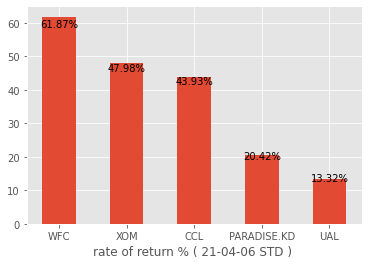

In [164]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import  style            

style.use('ggplot')
my_stock = ['WFC', 'XOM', 'CCL', 'PARADISE.KD', 'UAL']
my_profit = [61.87, 47.98, 43.93, 20.42, 13.32 ]
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)

##### 이 부분만 변경, 수직 방향 차트, 세로 
pos = np.arange(5)        
rects = plt.bar(pos, my_profit, align='center', width=0.5)
plt.xticks(pos, my_stock)

for i, rect in enumerate(rects):
  ax.text( rect.get_x() + rect.get_width() / 2.0, 0.95 * rect.get_height(), str(my_profit[i]) + '%', ha='center')
#####

plt.xlabel('rate of return % ( 21-04-06 STD ) ')
plt.show()

**Pie Chart**

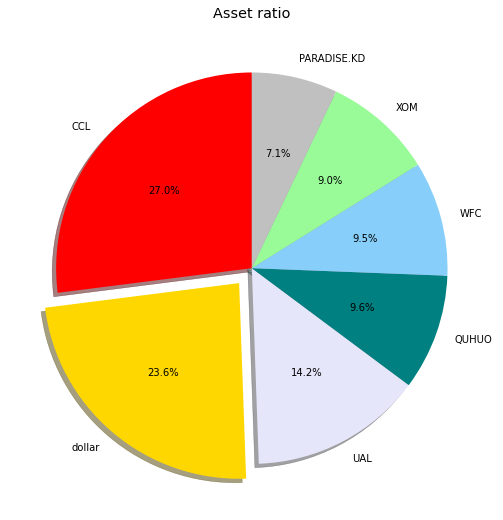

In [204]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style

style.use('ggplot')

fig = plt.figure(figsize=(9, 9))

colors = ['red', 'gold', 'lavender', 'teal', 'lightskyblue', 'palegreen', 'silver']     # 각 색깔 설정
my_stock = ['CCL', 'dollar', 'UAL', 'QUHUO', 'WFC', 'XOM', 'PARADISE.KD']
my_price = [2282577, 1990821, 1203611, 809129, 801460, 764648, 598500 ]           # 21-04-06 기준
explode = (0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0)   # 확대 시키는 거


title = "Asset ratio"    # 제목 / 합산금액 나중에 띄우기
plt.title(title)

# Figure, AxesSubplot 객체 생성 안해도 자동으로 호출함. Pie는 호출 안하고 출력

plt.pie(my_price, explode = explode, labels=my_stock, colors = colors, autopct='%1.1f%%', shadow=True, startangle=90)
# 파라미터 : plt.pie(데이터 차지 비율, 확대, 범주, 색상, 비율 수치 출력, 그림자 설정, 시작 각도 : CCL 부터 90도 각도로 부터 그려짐)
plt.show()
